In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Explore the data

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Preprocess the data

If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

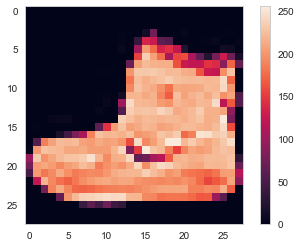

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

plt.show()

pixel values to a range of 0 to 1 before feeding to the neural network model.

cast the datatype of the image components from and integer to a float, and divide by 255. 

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
train_images.dtype

dtype('float64')

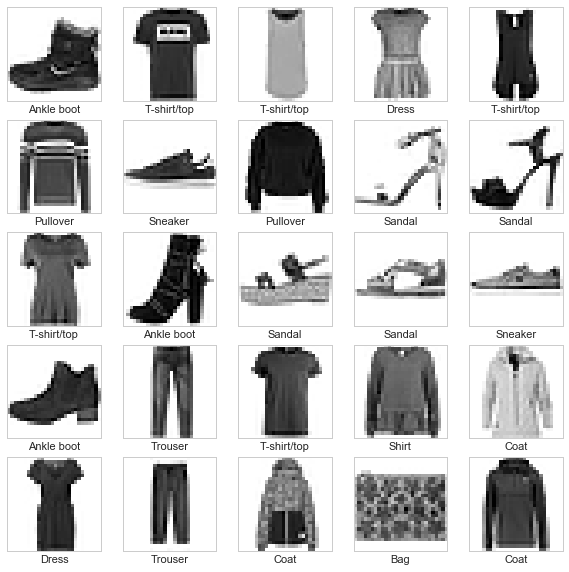

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [41]:
# 방법 1
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
# 방법 2
model2 = Sequential([])
model2.add(Dense(128, input_dim=784, activation=tf.nn.relu))
model2.add(Dense(10, activation=tf.nn.softmax))

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 x 28 = 784 pixels.   
Think of this layer as unstacking rows of pixels in the image and lining them up.   
This layer has **no parameters to learn, it only reformats the data.**

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers.

The second (and last) layer is a 10-node softmax layer  
: this returns an array of 10 probability scores that sum to 1.  
: Each node contains a score that indicates the probability that the current image belongs to one of the 10 digit classes.

## Compile the model

model needs a few more settings.  
These are added during **the model's compile step**  
* Optimiezer : This is how the model is updated based on the data it sees and its loss function.
* lost function : This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* Metrics : Used to monitor the training and testing steps.

In [43]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

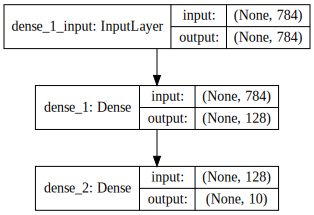

In [19]:
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

**Note:**
* model_to_dot 명령이나 summary 명령으로 모델 내부의 layers 리스트를 살펴봄으로써 내부 구조를 확인
* model1은 이렇게 안됨

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
l1 = model.layers[1]
l2 = model.layers[2]

In [22]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()

('dense_1',
 tensorflow.python.keras._impl.keras.layers.core.Dense,
 (None, 128),
 'relu',
 100480)

## Train the model

In [44]:
%%time
hist = model.fit(train_images, train_labels, 
                 epochs=5, batch_size=None,
                 validation_data=(test_images, test_labels), 
                 verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.5017 - acc: 0.8233 - val_loss: 0.4355 - val_acc: 0.8430
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3777 - acc: 0.8653 - val_loss: 0.3994 - val_acc: 0.8522
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3354 - acc: 0.8778 - val_loss: 0.3785 - val_acc: 0.8641
Epoch 4/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.3137 - acc: 0.8846 - val_loss: 0.3719 - val_acc: 0.8658
Epoch 5/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.2952 - acc: 0.8923 - val_loss: 0.3615 - val_acc: 0.8699
CPU times: user 22.5 s, sys: 2.67 s, total: 25.2 s
Wall time: 15.8 s


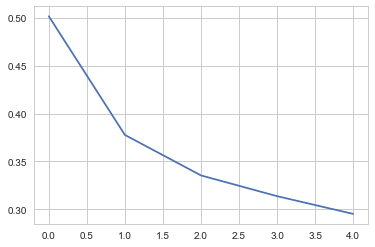

In [45]:
plt.plot(hist.history['loss'])
plt.show()

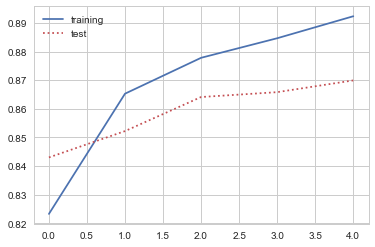

In [46]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [ ]:
# Evaluate Accuracy

# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print('Test accuracy:', test_acc)

### 가중치 정보

In [47]:
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 128), (128,))

In [48]:
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((128, 10), (10,))

## Make Predictions

In [49]:
predictions = model.predict(test_images)

In [50]:
predictions[0]

array([7.8358307e-06, 1.0193422e-07, 2.4108003e-08, 6.6545915e-08,
       2.0952199e-07, 2.2215690e-03, 1.6579382e-06, 2.8895183e-02,
       5.0582592e-05, 9.6882278e-01], dtype=float32)

In [51]:
np.argmax(predictions[0])

9

In [52]:
test_labels[0]

9

**Observe:**  
A prediction is an array of 10 numbers.   
These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing.   
We can see see which label has the highest confidence value.

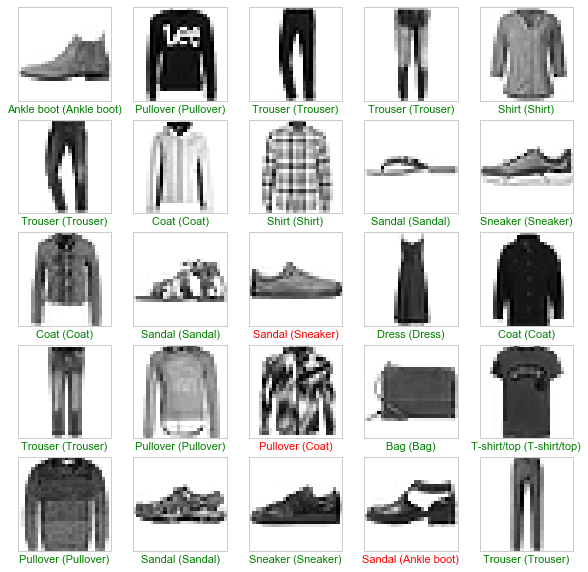

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                               class_names[true_label]),
              color=color)

## Make a prediction about a single image

In [59]:
img = test_images[0]

print(img.shape)

(28, 28)


**Note:**  
models are optimized to make predictions on a batch, or collection  
So even though we're using a single image, we need to add it to a list

In [60]:
img = np.expand_dims(img,0)

print(img.shape)

(1, 28, 28)


**Note:**  
*model.predict* returns **a list of lists**   
one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [61]:
predictions = model.predict(img)

print(predictions)

[[7.8358307e-06 1.0193422e-07 2.4107957e-08 6.6545795e-08 2.0952199e-07
  2.2215680e-03 1.6579352e-06 2.8895188e-02 5.0582497e-05 9.6882278e-01]]


In [63]:
prediction = predictions[0]

prediction

array([7.8358307e-06, 1.0193422e-07, 2.4107957e-08, 6.6545795e-08,
       2.0952199e-07, 2.2215680e-03, 1.6579352e-06, 2.8895188e-02,
       5.0582497e-05, 9.6882278e-01], dtype=float32)

In [64]:
np.argmax(predictions)

9